# Finance Data Project 

Exploratory data analysis of stock prices. The project aims to discover how the stocks progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

Get data using pandas datareader. Get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo



In [2]:
start_date = datetime.datetime(2006,1,1)
end_date = datetime.datetime(2016,1,1)

In [5]:
BAC = data.DataReader("BAC","stooq", start_date, end_date)
C = data.DataReader("C","stooq", start_date, end_date)
GS = data.DataReader("GS","stooq", start_date, end_date)
JPM = data.DataReader("JPM","stooq", start_date, end_date)
MS = data.DataReader("MS","stooq", start_date, end_date)
WF = data.DataReader("WFC","stooq", start_date, end_date)

List of the ticker symbols (as strings) in alphabetical order:

In [6]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

Concatenate the bank dataframes together.

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WF], keys=tickers, axis=1)
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 30 columns]

Set the column name levels:

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.index.name = "Date"
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]


# EDA

Let's explore the data a bit! 

The max Close price for each bank's stock throughout the time period:

In [9]:
idx = pd.IndexSlice
bank_stocks.loc[:,idx[:, "Close"]].max()

Bank Ticker  Stock Info
BAC          Close          46.2013
C            Close         466.8120
GS           Close         203.6910
JPM          Close          57.1634
MS           Close          58.5624
WFC          Close          47.0925
dtype: float64

In [10]:
bank_stocks.xs(key="Close",axis=1,level="Stock Info").max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

The returns for each bank's stock. Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

# reverse the bank_stocks df
bank_stocks = bank_stocks.reindex(index=bank_stocks.index[::-1])
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

pandas pct_change() method on the Close column to create a column representing this return value

In [14]:
for tick in tickers: 
    returns[tick + " Return"] = bank_stocks[tick]["Close"].pct_change()
    
#returns = bank_stocks.xs(key="Close", axis=1, level="Stock Info").pct_change()

returns.head()


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


Explore the returns dataframe.

C:\Users\simon\.conda\envs\udemyLearning\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


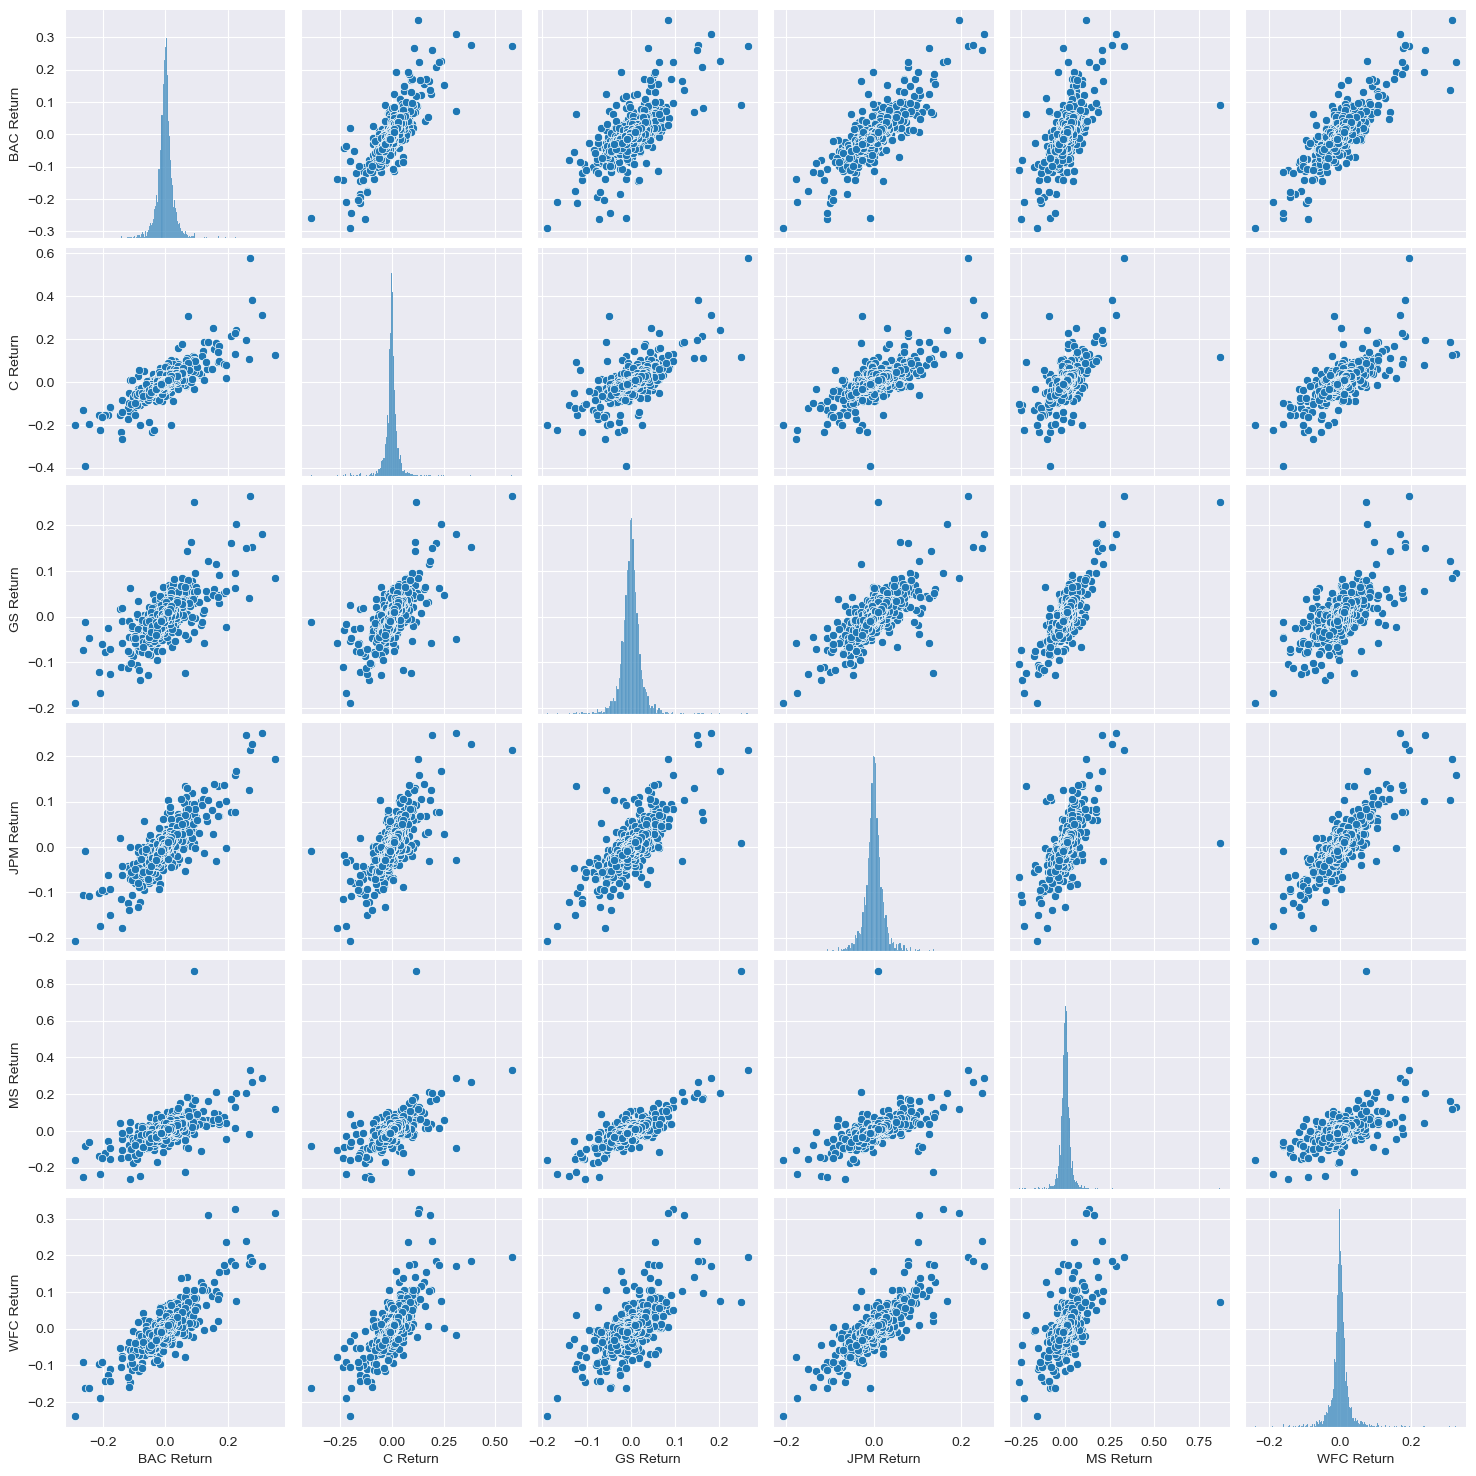

In [15]:
sns.pairplot(returns[1:])

The worst single day returns: 

In [111]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

4 stocks were worst on 2009-01-20 when Barack Obama was inaugurated as president of the US.

The best single day returns:

In [112]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

MS (Morgan Stanley) had a crisis in 2008. The worst and best single day returns are 3 days away in its history.

JPM was affected by inauguration day. 

The standard deviation of the returns. The riskiest over the entire time period was Citigroup but similar profiles based on the data.

In [113]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

The riskiest for the year 2015 was BAC and MS. But again, similar profiles.

In [117]:
returns.loc[pd.Timestamp('2015-1-1 01:00:00'):pd.Timestamp('2015-12-31 23:00:00')].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

Distplot of the 2015 returns for Morgan Stanley

C:\Users\simon\AppData\Local\Temp\ipykernel_11752\2296067150.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc[pd.Timestamp('2015-1-1 01:00:00'):pd.Timestamp('2015-12-31 23:00:00')]["MS Return"], bins=100)


<Axes: xlabel='MS Return', ylabel='Density'>

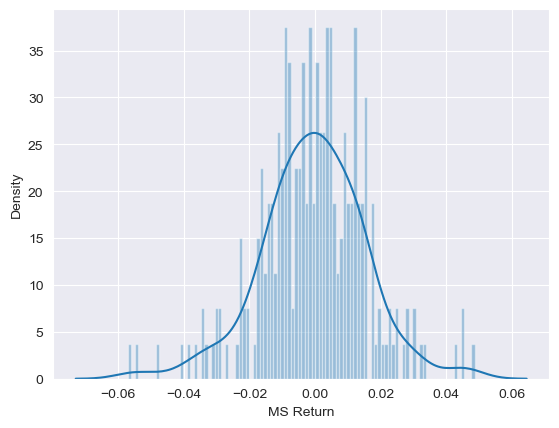

In [16]:
sns.distplot(returns.loc[pd.Timestamp('2015-1-1 01:00:00'):pd.Timestamp('2015-12-31 23:00:00')]["MS Return"], bins=100)

Distplot of the 2008 returns for CitiGroup

C:\Users\simon\AppData\Local\Temp\ipykernel_11752\3961857283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc[pd.Timestamp('2008-1-1 01:00:00'):pd.Timestamp('2008-12-31 23:00:00')]["C Return"], bins=100)


<Axes: xlabel='C Return', ylabel='Density'>

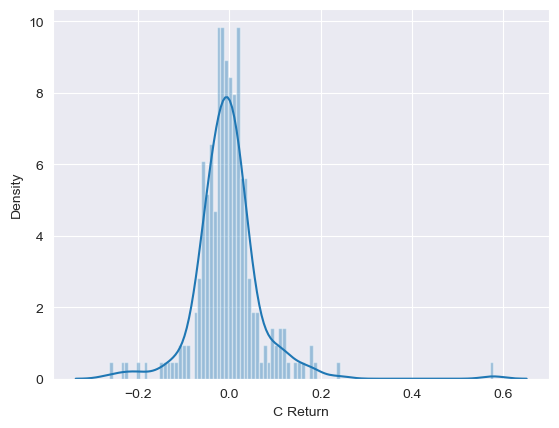

In [17]:
sns.distplot(returns.loc[pd.Timestamp('2008-1-1 01:00:00'):pd.Timestamp('2008-12-31 23:00:00')]["C Return"], bins=100)


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

The rolling 30 day average against the Close Price for Bank Of America's stock 

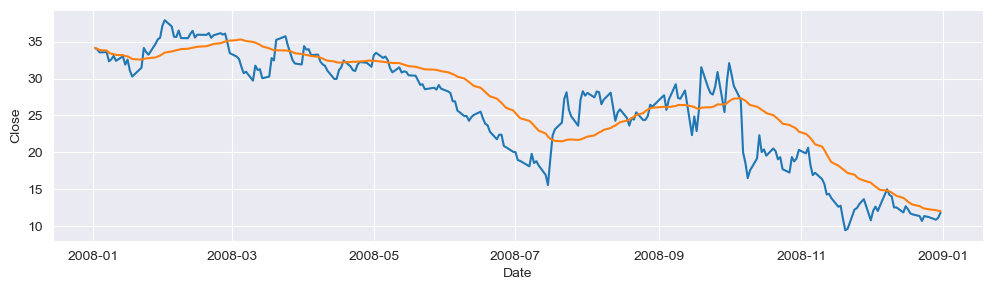

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
ax = sns.lineplot(bank_stocks["BAC"]["Close"].loc["2008-01-01":"2008-12-31"])
ax = sns.lineplot(bank_stocks["BAC"]["Close"].loc["2008-01-01":"2008-12-31"].rolling(window=30, min_periods=1).mean())

Heatmap of the correlation between the stocks Close Price.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

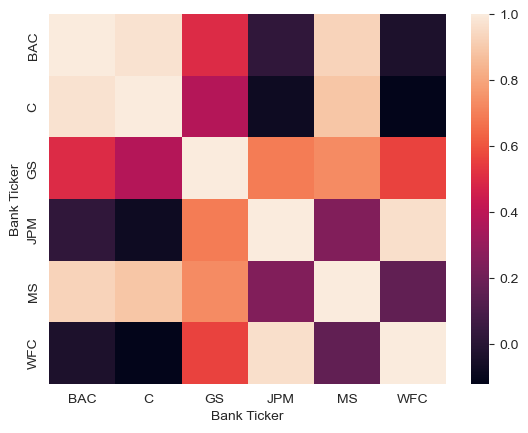

In [19]:
sns.heatmap(bank_stocks.xs(axis=1, level="Stock Info", key="Close").corr())


Clustermap to cluster the correlations together:

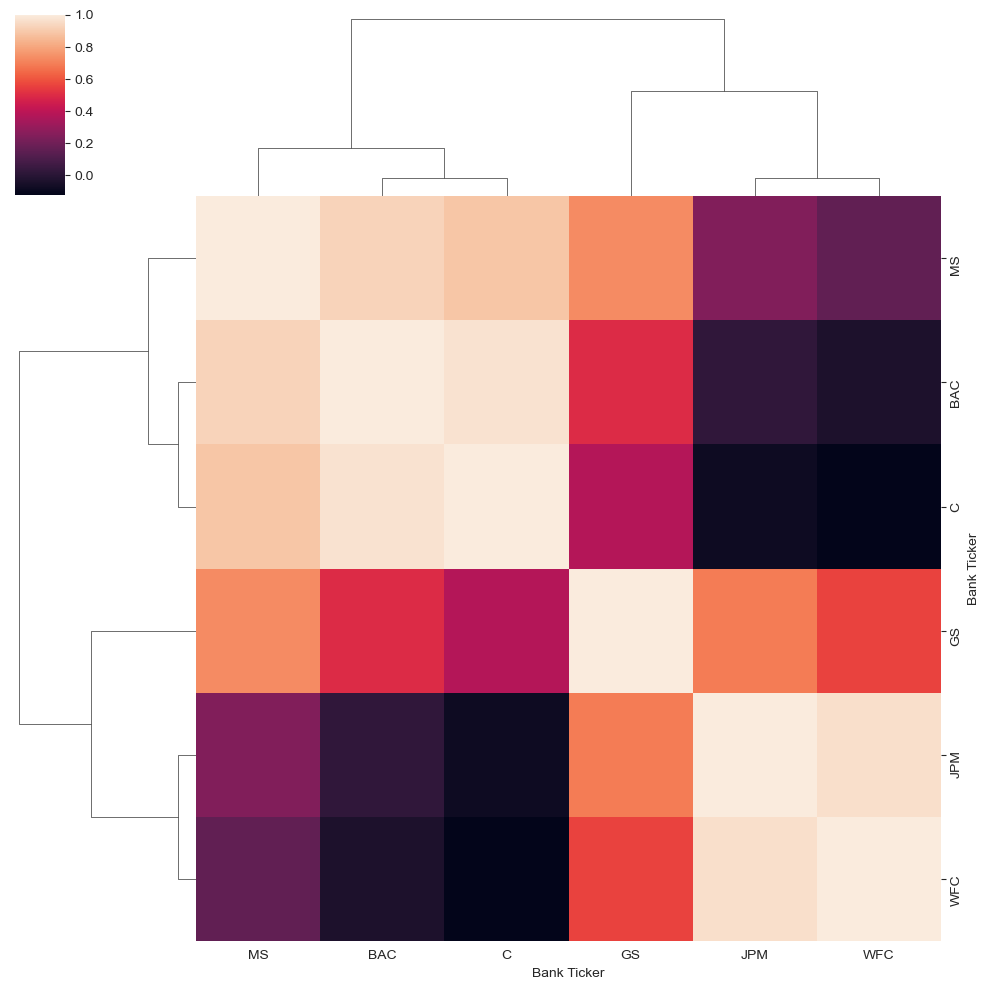

In [20]:
sns.clustermap(bank_stocks.xs(axis=1, level="Stock Info", key="Close").corr())